# ROC Curves and AUC - Lab


## Introduction 

In this lab, you'll practice drawing ROC graphs, calculating AUC, and interpreting these results. In doing so, you will also further review logistic regression, by briefly fitting a model as in a standard data science pipeline.

## Objectives

You will be able to:

- Create a visualization of ROC curves and use it to assess a model 
- Evaluate classification models using the evaluation metrics appropriate for a specific problem 

## Train the model

Start by repeating the previous modeling steps we have discussed. For this problem, you are given a dataset `'mushrooms.csv'`. Your first job is to train a `LogisticRegression` classifier on the dataset to determine whether the mushroom is edible (e) or poisonous (p). The first column of the dataset `class` indicates whether or not the mushroom is poisonous or edible.

But first, 

- Import the data 
- Print the first five rows of the data 
- Print DataFrame's `.info()` 

In [7]:
# Import and preview the data
import pandas as pd

df = pd.read_csv('mushrooms.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


The next step is to define the predictor and target variables. Did you notice all the columns are of type `object`? So you will need to first create dummy variables. 

- First, create a dummy variable for the `'class'` column. Make sure you drop the first level 
- Drop the `'class'` column from `df` and then create dummy variables for all the remaining columns. Again, make sure you drop the first level 
- Import `train_test_split` 
- Split the data (`X` and `y`) into training and test sets with 25% in the test set. Set `random_state` to 42 to ensure reproducibility 

In [9]:
# Define y
y = pd.get_dummies(df['class'], drop_first=True)
y = y['p']

# Define X
X = df.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

- Fit the vanilla logistic regression model we defined for you to training data 
- Make predictions using this model on test data 

In [11]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model to training data
model_log = logreg.fit(X_train, y_train)

# Predict on test set
y_hat_test = logreg.predict(X_test)

## Calculate TPR and FPR
  
Next, calculate the false positive rate and true positive rate (you can use the built-in functions from `sklearn`): 

In [15]:
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_score = model_log.decision_function(X_test)

# Calculate the fpr, tpr, and thresholds for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_score)

## Draw the ROC curve

Next, use the false positive rate and true positive rate to plot the Receiver Operating Characteristic Curve for both the train and test sets.

AUC: 1.0


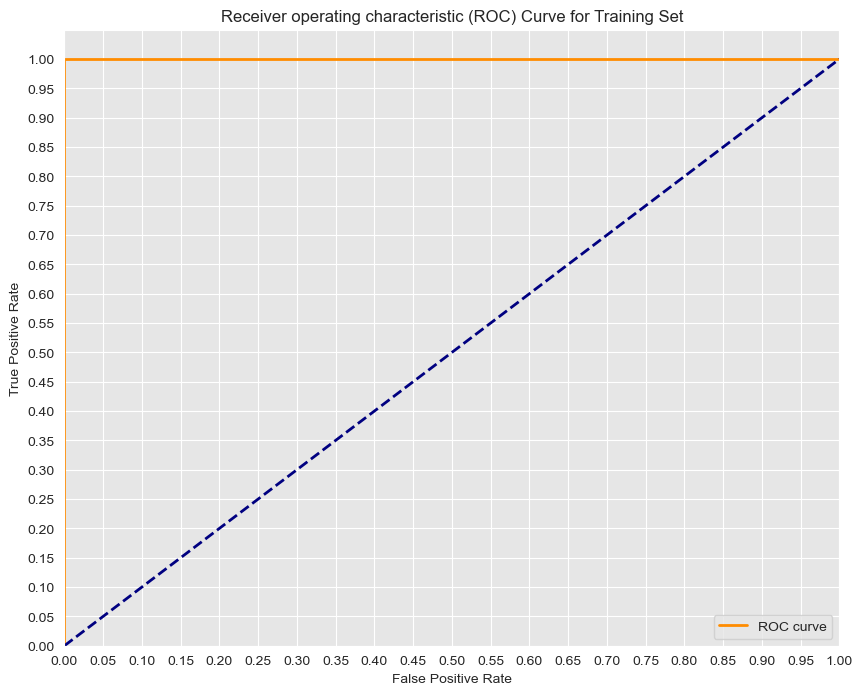

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

AUC: 1.0


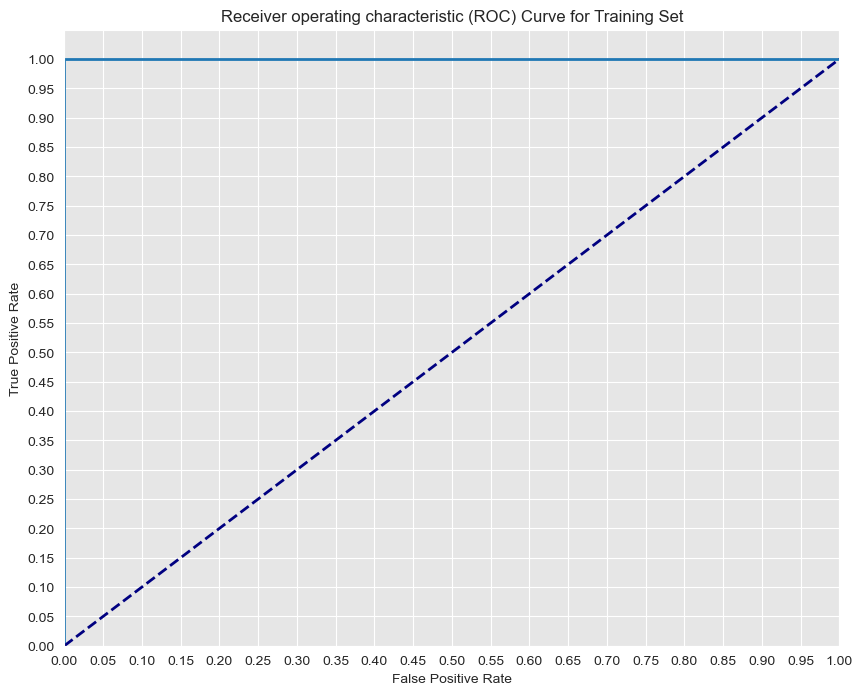

In [21]:
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

What do you notice about these ROC curves? Your answer here: 

In [ ]:
"""
Both show a 1.0, which indicates that the predictions were 100% accurate, which is extremely suspicious. I would bet that there is overfitting.
"""

## Interpret ROC curves

Since the mushroom model is atypically perfect, let's consider another dataset to practice interpreting ROC curves. This heart disease [dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) is widely used in machine learning and a csv file of the data is in the GitHub repository.

Look at the the heart disease's model ROC curve:  

<img src="https://curriculum-content.s3.amazonaws.com/data-science/images/lesson_roc_graph.png">

Think about the scenario of this model: predicting heart disease. If you tune the current model to have an 82% True Positive Rate, (you've still missed 18% of those with heart disease), what is the False positive rate? 

In [23]:
# Write the approximate fpr when tpr = 0.8
fpr = .2

If you instead tune the model to have a 95.2% True Postive Rate, what will the False Postive Rate be?

In [26]:
# Write the approximate fpr when tpr = 0.95
fpr = .26

In the case of heart disease dataset, do you find any of the above cases acceptable? How would you tune the model? Describe what this would mean in terms of the number of patients falsely scared of having heart disease and the risk of missing the warning signs for those who do actually have heart disease.

Your answer here: 

In [29]:
"""
For something like heart disease, there is a much higher expectation for accuracy. However, the most important type of error to mitigate is type 2
errors. As it is better to warn somebody that they may have heart disease when they dont then to not warn them and they do.
"""

'\nFor something like heart disease, there is a much higher expectation for accuracy. However, the most important type of error to mitigate is type 2\nerrors. As it is better to warn somebody that they may have heart disease when they dont then to not warn them and they do.\n'

## Summary

In this lab you further explored ROC curves and AUC, drawing graphs and then interpreting these results to lead to a more detailed and contextualized understanding of your model's accuracy.